In [1]:
import requests
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd
import tensorflow as tf
import tensorflow_hub as hub
import imageio
from google_images_download import google_images_download
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image, ImageOps
from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.filters import gaussian
from skimage.measure import ransac
from skimage.transform import AffineTransform
from skimage import color, io
from skimage.exposure import rescale_intensity


ModuleNotFoundError: ignored

In [11]:
import requests
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd
import tensorflow as tf
import tensorflow_hub as hub
import imageio
from google_images_download import google_images_download
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image, ImageOps
from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.filters import gaussian
from skimage.measure import ransac
from skimage.transform import AffineTransform
from skimage import color, io
from skimage.exposure import rescale_intensity


Using TensorFlow backend.


In [19]:
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
height, width

(224, 224)

In [20]:
response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal national park", "limit": 20,
             "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal national park
Evaluating...
Starting Download...
Image URL: https://i.ytimg.com/vi/P8NJa_YoRxk/maxresdefault.jpg
Completed Image ====> 1.maxresdefault.jpg
Image URL: https://www.nps.gov/arch/learn/nature/images/ARK_6.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Completed Image ====> 2.ARK_6.jpg
Image URL: https://k6u8v6y8.stackpathcdn.com/blog/wp-content/uploads/2017/06/Royal-Bengal-Tiger.jpg
Completed Image ====> 3.Royal-Bengal-Tiger.jpg
Image URL: https://npca.s3.amazonaws.com/images/8135/2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg?1445969501
Completed Image ====> 4.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg
Image URL: https://www.corbettnationalpark.in/blog/wp-content/uploads/2015/08/cropped-13625772024_1fd7467d29_k1.jpg
Completed Image ====> 5.cropped-13625772024_1fd7467d29_k1.jpg
Image URL: https://k6u8v6y8.stackpathcdn.com/blog/wp-content/uploads/2014/04/national-parks-and-wildlife-sanctuaries-in-india.png
Completed Image ====> 6.

In [21]:
image_list = absolute_image_paths[0]['animal national park']
image_list

['/content/downloads/animal national park/1.maxresdefault.jpg',
 '/content/downloads/animal national park/2.ARK_6.jpg',
 '/content/downloads/animal national park/3.Royal-Bengal-Tiger.jpg',
 '/content/downloads/animal national park/4.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg',
 '/content/downloads/animal national park/5.cropped-13625772024_1fd7467d29_k1.jpg',
 '/content/downloads/animal national park/6.national-parks-and-wildlife-sanctuaries-in-india.png',
 '/content/downloads/animal national park/7.VOYA_web_deer.jpg',
 '/content/downloads/animal national park/8.a2d539ed-8489-4eb4-a135-14e7e9e0e84a-banner.jpg',
 '/content/downloads/animal national park/9.moose-moosecalf-1280x853.jpg',
 '/content/downloads/animal national park/10.zebras-in-kidepo-750x450.jpg',
 '/content/downloads/animal national park/11.addo-elephant-national-park-elephants-590x390.jpg',
 '/content/downloads/animal national park/12.nameri-national-park-is-famous-for-which-animal.jpg',
 '/content/downloads/animal n

In [0]:
def resize_image(filename, new_width=224, new_height=224):
    pil_image = Image.open(filename)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert('RGB')
    pil_image_rgb.save(filename, format='JPEG', quality=90)
#     print(filename)
    return filename

In [23]:
images = [resize_image(image) for image in image_list]
images

['/content/downloads/animal national park/1.maxresdefault.jpg',
 '/content/downloads/animal national park/2.ARK_6.jpg',
 '/content/downloads/animal national park/3.Royal-Bengal-Tiger.jpg',
 '/content/downloads/animal national park/4.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg',
 '/content/downloads/animal national park/5.cropped-13625772024_1fd7467d29_k1.jpg',
 '/content/downloads/animal national park/6.national-parks-and-wildlife-sanctuaries-in-india.png',
 '/content/downloads/animal national park/7.VOYA_web_deer.jpg',
 '/content/downloads/animal national park/8.a2d539ed-8489-4eb4-a135-14e7e9e0e84a-banner.jpg',
 '/content/downloads/animal national park/9.moose-moosecalf-1280x853.jpg',
 '/content/downloads/animal national park/10.zebras-in-kidepo-750x450.jpg',
 '/content/downloads/animal national park/11.addo-elephant-national-park-elephants-590x390.jpg',
 '/content/downloads/animal national park/12.nameri-national-park-is-famous-for-which-animal.jpg',
 '/content/downloads/animal n

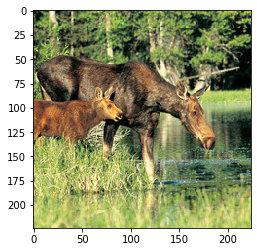

In [0]:
plt.imshow(np.asarray(Image.open(images[11])))

In [25]:
real_images = np.array([np.asarray(Image.open(image)) / 255 for image in images])
real_images.shape

(20, 224, 224, 3)

In [0]:
real_images.shape

(20, 224, 224, 3)

In [0]:
logits = module(real_images)

In [0]:
target_map = requests.get('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt').content

In [0]:
str(target_map).split('\\n')

['b"background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock pytho

In [0]:
lookup = [target.strip(r"'b'").strip(r'"') for target in str(target_map).split('\\n')]

In [0]:
logits[4]

<tf.Tensor 'strided_slice_22:0' shape=(1001,) dtype=float32>

In [0]:
lookup[np.argmax(logits[11])]

'background'

In [0]:
response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal national park", "limit": 20,
             "print_urls": True}
absolute_image_paths = response.download(arguments)

In [0]:
absolute_image_paths[0]['animal national park']

In [5]:
!pip install google_images_download

     |████████████████████████████████| 911kB 7.0MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=7171041646e11cda1476051b942ef6e6d82ef449acdca07e4903ec18e1747f1a
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download


In [36]:
! wget https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

--2019-08-21 15:51:04--  https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10484 (10K) [text/plain]
Saving to: ‘ImageNetLabels.txt’

ImageNetLabels.txt  100%[===================>]  10.24K  --.-KB/s    in 0s      

2019-08-21 15:51:04 (74.8 MB/s) - ‘ImageNetLabels.txt’ saved [10484/10484]



In [39]:
real_images = np.array([np.asarray(Image.open(image)) / 255 for image in images])
real_images.shape

(20, 224, 224, 3)

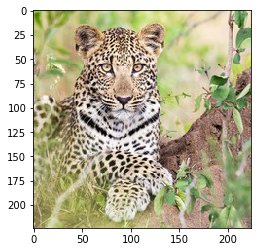

In [46]:
plt.imshow(Image.open(images[0]))

In [0]:
# TF Hub landing page example
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow as tf

module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
#images = [load_and_preprocess_image(i, width, height) for i in images_path]
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())
  logits = module(real_images).eval()

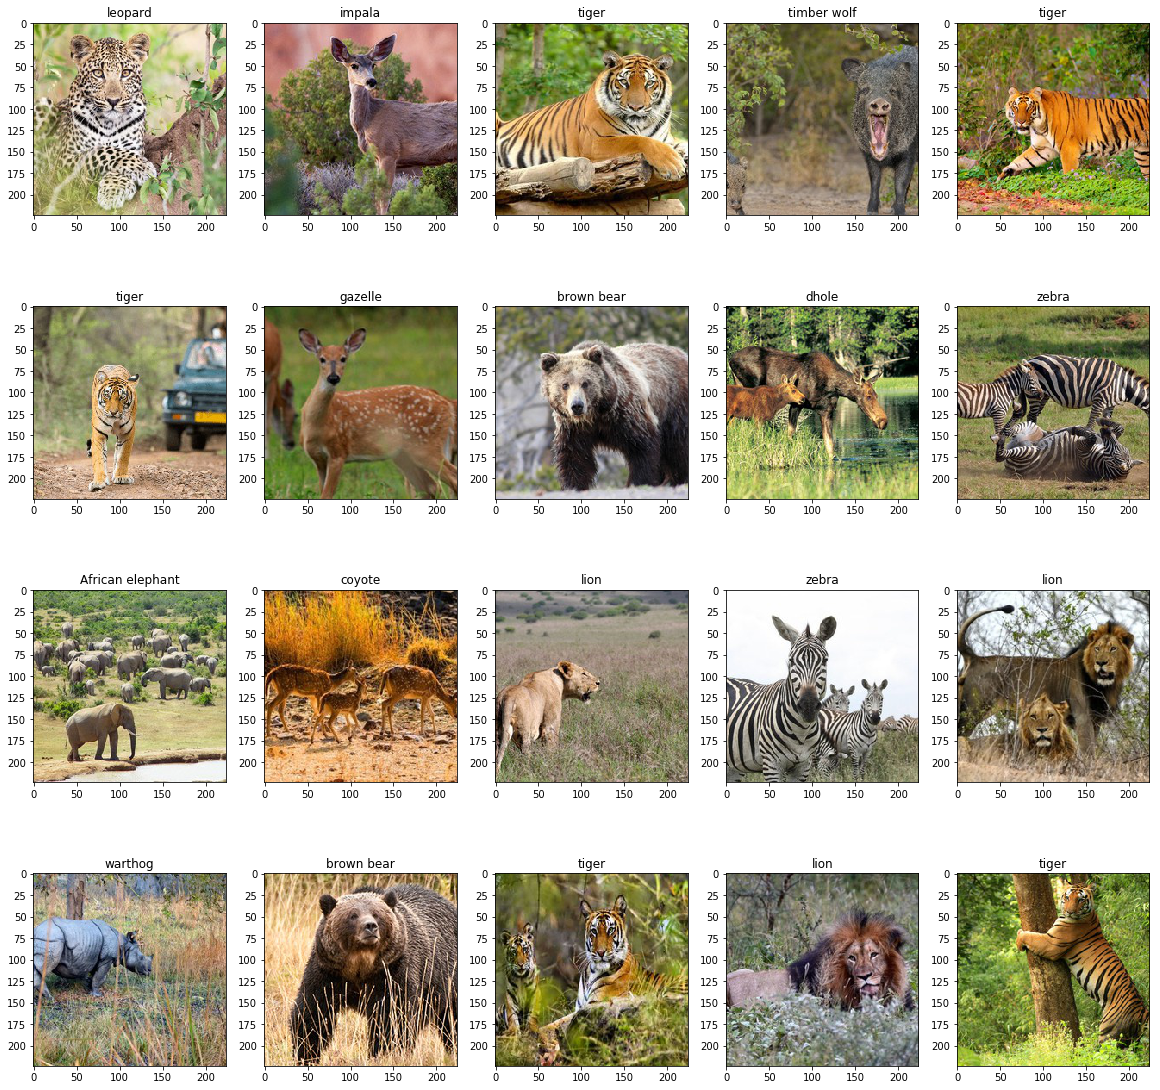

In [50]:
# let's plot!
import math
cols = 5
rows = math.ceil(len(real_images)/5)
fig=plt.figure(figsize=(20, 20))
with open('ImageNetLabels.txt') as f:
  labels = [line.strip() for line in f.readlines()]
with tf.Session() as sess:
  for idx,image in enumerate(real_images):
    fig.add_subplot(rows, cols, idx+1)
    plt.imshow(image)
    plt.title(labels[np.argmax(logits[idx])])


  
plt.show()

In [38]:
for idx,image in real_images:
  print(image)

ValueError: ignored